# Logistic Regression Comparison with KNN and Decision Tree

## Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Load Dataset

In [65]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

## EDA

In [66]:
df.shape

(5110, 12)

In [67]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Cleaning

In [69]:
df = df.drop("id", axis=1)

In [70]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [71]:
df.duplicated().sum()

np.int64(0)

In [72]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [73]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [74]:
df['bmi'].median()

28.1

In [75]:
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

In [76]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [77]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


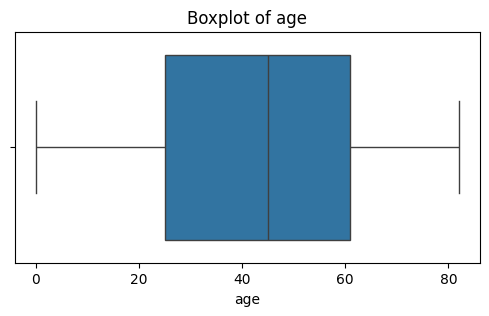

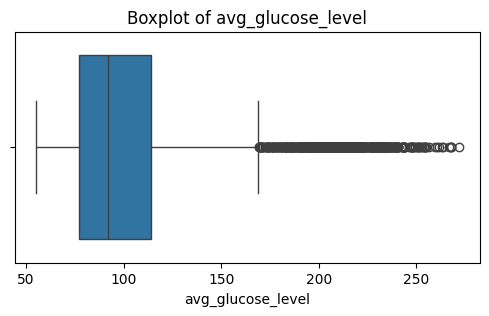

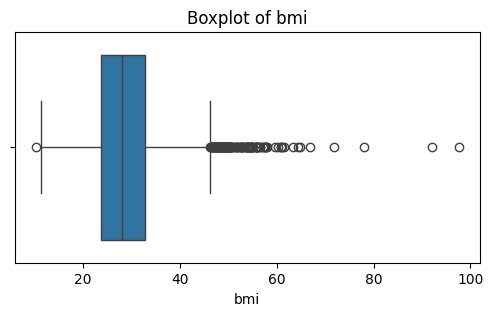

In [78]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [79]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
              np.where(df[col] > upper, upper, df[col]))
    return df

for col in num_cols:
    df = cap_outliers(df, col)

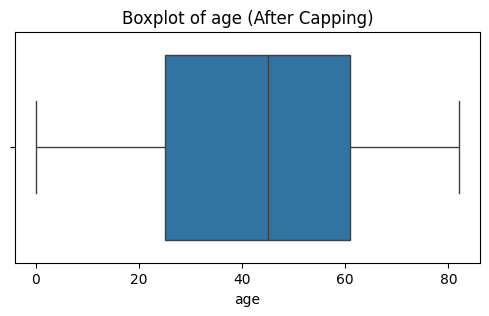

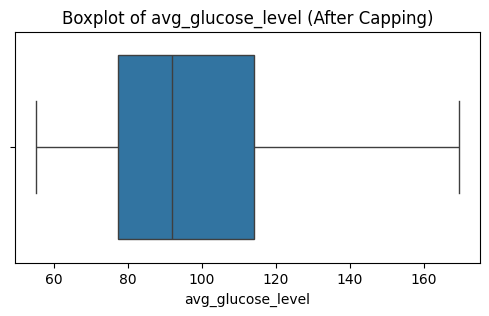

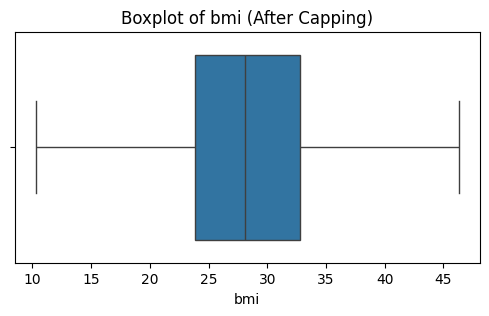

In [80]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Capping)')
    plt.show()

In [81]:
df = df[df['gender'] != 'Other']
print(df['gender'].value_counts())

gender
Female    2994
Male      2115
Name: count, dtype: int64


In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])

print("\nAfter Label Encoding:")
print(df['gender'].value_counts())

print(dict(zip(le.classes_, le.transform(le.classes_))))


After Label Encoding:
gender
0    2994
1    2115
Name: count, dtype: int64
{'Female': np.int64(0), 'Male': np.int64(1)}


In [83]:
df = pd.get_dummies(df, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=False)

In [84]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,Yes,169.3575,36.6,1,False,False,True,False,False,False,True,False,True,False,False
1,0,61.0,0,0,Yes,169.3575,28.1,1,False,False,False,True,False,True,False,False,False,True,False
2,1,80.0,0,1,Yes,105.9200,32.5,1,False,False,True,False,False,True,False,False,False,True,False
3,0,49.0,0,0,Yes,169.3575,34.4,1,False,False,True,False,False,False,True,False,False,False,True
4,0,79.0,1,0,Yes,169.3575,24.0,1,False,False,False,True,False,True,False,False,False,True,False


In [85]:
df['age'] = df['age'].astype(int)
print(df['age'].dtype)

int64


In [86]:
X = df.drop("stroke", axis=1)   # drop target column
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target distribution in Train:\n", y_train.value_counts(normalize=True))
print("Target distribution in Test:\n", y_test.value_counts(normalize=True))

Train shape: (4087, 18)
Test shape: (1022, 18)
Target distribution in Train:
 stroke
0    0.951309
1    0.048691
Name: proportion, dtype: float64
Target distribution in Test:
 stroke
0    0.951076
1    0.048924
Name: proportion, dtype: float64


In [87]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
avg_glucose_level,0
bmi,0
stroke,0
work_type_Govt_job,0
work_type_Never_worked,0


In [88]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,Yes,169.3575,36.6,1,False,False,True,False,False,False,True,False,True,False,False
1,0,61,0,0,Yes,169.3575,28.1,1,False,False,False,True,False,True,False,False,False,True,False
2,1,80,0,1,Yes,105.9200,32.5,1,False,False,True,False,False,True,False,False,False,True,False
3,0,49,0,0,Yes,169.3575,34.4,1,False,False,True,False,False,False,True,False,False,False,True
4,0,79,1,0,Yes,169.3575,24.0,1,False,False,False,True,False,True,False,False,False,True,False


In [89]:
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})

bool_cols = ['ever_married', 'heart_disease',
             'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
             'work_type_Never_worked', 'work_type_children',
             'Residence_type_Rural', 'Residence_type_Urban',
             'smoking_status_Unknown', 'smoking_status_formerly smoked',
             'smoking_status_never smoked', 'smoking_status_smokes']

for col in bool_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].map({'No': 0, 'Yes': 1, True: 1, False: 0})
    else:
        df[col] = df[col].astype(int)

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Scaling for KNN

In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training KNN

In [99]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn

0.949119373776908

## Training Decision Tree

In [100]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
acc_dt

0.9442270058708415

## Training Logistic Regression

In [102]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lr

0.9510763209393346

## Model Accuracy

In [103]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Decision Tree"],
    "Accuracy": [acc_lr, acc_knn, acc_dt],
})

print(results)

                 Model  Accuracy
0  Logistic Regression  0.951076
1                  KNN  0.949119
2        Decision Tree  0.944227


## Visualization

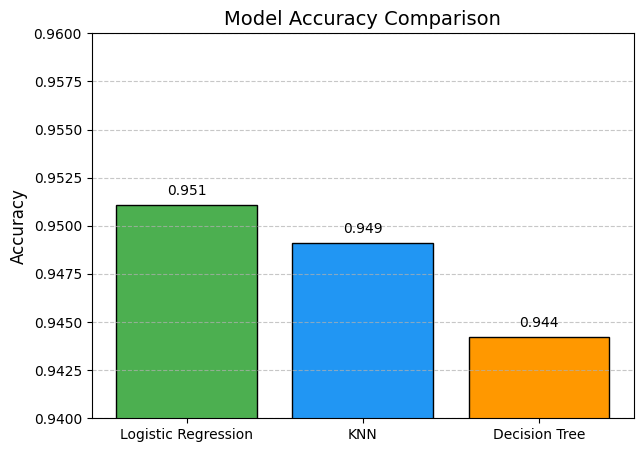

In [108]:
models = ["Logistic Regression", "KNN", "Decision Tree"]
accuracy = [0.951076, 0.949119, 0.944227]

plt.figure(figsize=(7,5))
bars = plt.bar(models, accuracy, color=["#4CAF50", "#2196F3", "#FF9800"], edgecolor="black")

plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.94, 0.96)
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.0005,
             f"{acc:.3f}", ha="center", fontsize=10)

plt.show()

📊 Model Accuracy Comparison

- Logistic Regression achieved the highest accuracy at **0.951**.

- KNN performed very close, with an accuracy of **0.949** (only a 0.2% difference from Logistic Regression).

- Decision Tree had the lowest accuracy among the three at **0.944**, though still competitive.

🔍 Key Insights

All three models perform similarly well on this dataset (differences are minor).

- Logistic Regression seems to generalize slightly better, making it the most reliable baseline.

- KNN is nearly as good, but slightly less accurate, possibly due to sensitivity to feature scaling or noise.

- Decision Tree is a bit weaker here, likely because it can overfit when not tuned (though accuracy is still strong).

Overall: Logistic Regression remains the best choice here, but KNN is a very close alternative.